In [1]:
from mfractal_mri import mfractal_mri

/home/grela/.local/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


#### basic test

In [10]:
%timeit -n 1 -r 1
print('a')

a


In [8]:
%timeit -n 1 -r 1
scan_file = 'test-data/scanfile.nii.gz'
ah = mfractal_mri()
ah.load_scan(scan_file)
ah._slice_scan(slice_axis='z')
ah._map_to_sfc()
ah._run_mfdfa()
H = ah._get_hursts()

/home/grela/miniconda3/envs/peano/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/grela/miniconda3/envs/peano/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/grela/.local/lib/python3.7/site-packages/MFDFA/MFDFA.py:241: RuntimeWarning: divide by zero encountered in float_power
  np.mean(np.float_power(F, q / 2), axis = 1),


In [11]:
%timeit -n 1 -r 1 ah.pipeline(nii_file = scan_file, slice_axis = 'z')

49.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### hursts

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
i0 = np.argwhere(ah.qs==2).item()

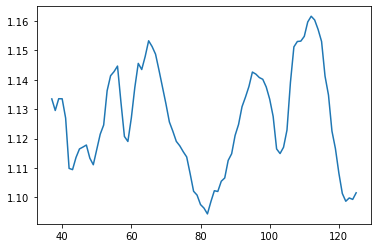

In [6]:
plt.plot(ah.H[:,i0])